# Machine learning program (median house value)

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import time

print("Tensorflow version: "+tf.__version__)

Tensorflow version: 2.3.0


## Examples from datasets

In [2]:
# Google file system
from google.colab import drive
drive.mount('/GoogleDrive', force_remount=True)

ATT_FILE =   "/GoogleDrive/My Drive/Colab Notebooks/Datasets/MedianHouseValuePreparedCleanAttributes.csv"
LABEL_FILE = "/GoogleDrive/My Drive/Colab Notebooks/Datasets/MedianHouseValueOneHotEncodedClasses.csv"

attributes = pd.read_csv(ATT_FILE)
label =      pd.read_csv(LABEL_FILE)

Mounted at /GoogleDrive


In [3]:
TRAIN_RATIO = 0.8

n_instances = attributes.shape[0]
n_train = int(n_instances*TRAIN_RATIO)
n_dev = int((n_instances - n_train)/2)

x_train = attributes.values[:n_train]
t_train = label.values[:n_train]
x_dev =   attributes.values[n_train:n_train + n_dev]
t_dev =   label.values[n_train:n_train + n_dev]

INPUTS =  x_train.shape[1]
OUTPUTS = t_train.shape[1]

NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_DEV_EXAMPLES =      int(round(x_dev.shape[0]/1))

print ("Number of training examples: ", NUM_TRAINING_EXAMPLES)
print ("Number of examples for development test: ", NUM_DEV_EXAMPLES)

Number of training examples:  16342
Number of examples for development test:  2043


## Model


In [4]:
n_neurons_per_hlayer = [500, 250, 75, 25]
learning_rate = 0.1


In [5]:
model = keras.Sequential(name="my_model")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,)))
for neurons in n_neurons_per_hlayer:
  model.add(keras.layers.Dense(neurons, activation="relu"))
model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))

In [6]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(lr=learning_rate),
              metrics=["categorical_accuracy"])


model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               5000      
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 75)                18825     
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1900      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 78        
Total params: 151,053
Trainable params: 151,053
Non-trainable params: 0
_________________________________________________________________


## Training
Aqui vienen los parametros de entrenamiento, y en history empieza el proceso de entramiento (fit)

In [7]:
n_epochs = 1000
batch_size = 512
start_time = time.clock()

In [8]:
history = model.fit(x_train, t_train, 
                    batch_size = batch_size, 
                    epochs=n_epochs, 
                    verbose = 0, 
                    validation_data = (x_dev, t_dev))

## Results

Se presentan los resultados y al final sale la info de error que utilizaremos para hacer los ejercicios

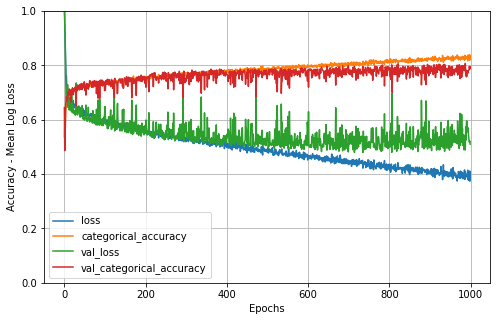

In [9]:
results = pd.DataFrame(history.history)
results.plot(figsize = (8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0,1]
plt.show()

In [10]:
print ("Error (training): ", 
       round((1 - results.categorical_accuracy.values[-1:][0])*100, 1), "%")
print ("Error (development test): ", 
       round((1 - results.val_categorical_accuracy.values[-1:][0])*100, 1), "%")
print ("Time: ", 
       round((time.clock() - start_time)),"seconds")

Error (training):  16.3 %
Error (development test):  20.6 %
Time:  100 seconds
